# Two color MOT

This example covers calculating the forces in a two-color type-II
three-dimensional MOT.  This example is based on Fig. 1 of M.R. Tarbutt and T.C. Steimle, “Modeling magneto-optical trapping of CaF molecules” *Physical Review A* **92**, 053401 (2015). http://dx.doi.org/10.1103/PhysRevA.92.053401

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp
import pylcp.tools

### Specify the problem
Here, we use $F=2 \rightarrow F'=1$ with $g_l=1$ and $g_u=0$.  For details about the units, chosen here see `01_F0_to_F1_1D_MOT_capture.ipynb`.  This notebook uses the *hybrid* unit system that requires us to neglect the magnetic forces in the rate equation.

In [17]:
Hg, Bgq = pylcp.hamiltonians.singleF(F=2, gF=0.5, muB=1)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(2, 1)

# Define the full Hamiltonian:
hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

# Define the magnetic field:
magField = pylcp.quadrupoleMagneticField(1)

### Run the detuning of the blue detuned beam

At every detuning point, calculate the trapping frequency and damping coefficient for the MOT. 

In [25]:
# Define the detunings:
dets = np.linspace(-5, 5, 101)
beta = 3.6

# The red detuned beams are constant in this calculation, so let's make that
# collections once:
r_beams = pylcp.conventional3DMOTBeams(
    delta=-1, beta=beta, pol=+1,
    beam_type=pylcp.infinitePlaneWaveBeam
)

it = np.nditer([dets, None, None])
for (det_i, omega_i, beta_i) in it:
    # Make the blue-detued beams:
    b_beams = pylcp.conventional3DMOTBeams(
        delta=det_i, beta=beta, pol=-1,
        beam_type=pylcp.infinitePlaneWaveBeam
    )
    
    all_beams = pylcp.laserBeams(b_beams.beam_vector + r_beams.beam_vector)

    trap = pylcp.rateeq(all_beams, magField, hamiltonian, include_mag_forces=False)
    omega_i[...] = trap.trapping_frequencies(axes=[2], eps=0.0001)
    beta_i[...] = trap.damping_coeff(axes=[2], eps=0.0001)

Plot up the result:

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


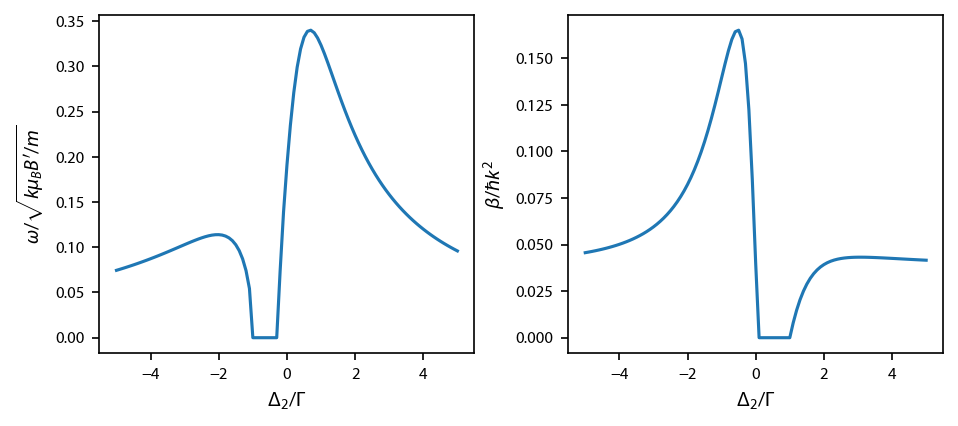

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(6.25, 2.75))
ax[0].plot(dets, it.operands[1])
ax[1].plot(dets, it.operands[2])

[ax_i.set_xlabel('$\Delta_2/\Gamma$') for ax_i in ax];
ax[0].set_ylabel('$\\omega/\sqrt{k \mu_B B\'/m}$')
ax[1].set_ylabel('$\\beta/\hbar k^2$')

fig.subplots_adjust(left=0.08, wspace=0.25)